In [5]:
#imports
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#5.1
class MyMLP(nn.Module):
    def __init__(self, num_input_features, num_hidden_neuron1, num_hidden_neuron2, num_output_neurons):
        super(MyMLP, self).__init__()
        self.hidden_layer1 = nn.Linear(num_input_features, num_hidden_neuron1)
        self.hidden_layer2 = nn.Linear(num_hidden_neuron1, num_hidden_neuron2)
        self.output_layer = nn.Linear(num_hidden_neuron2, num_output_neurons)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        X = torch.tensor(X, dtype=torch.float)
        hidden_res1 = self.relu(self.hidden_layer1(X))
        hidden_res2 = self.relu(self.hidden_layer2(hidden_res1))
        output = self.sigmoid(self.output_layer(hidden_res2))
        return output

In [7]:
#Dataset
class PrincessDataset(Dataset):
    def __init__(self,dataName):
        #dataloading
        xy = np.loadtxt(dataName, delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[0:, :-1])
        self.y = torch.from_numpy(xy[:,-1])
        self.n_samples = xy.shape[0]
    def __getitem__(self, index):
        return self.x[index] , self.y[index]
    def __len__(self):
        return self.n_samples

In [8]:
torch.manual_seed(200401093)
batch_size = 16
num_workers = 0
test_data = PrincessDataset('cure_the_princess_test.csv')
train_data = PrincessDataset('cure_the_princess_train.csv')
validation_data = PrincessDataset('cure_the_princess_validation.csv')

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_79852\1829612099.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Epoch 0 Training loss 0.713484447968157 Validation Loss : 0.653685238957405
Epoch 1 Training loss 0.6333242779291128 Validation Loss : 0.5920010462403298
Epoch 2 Training loss 0.5903002385851703 Validation Loss : 0.5513729587197304
Epoch 3 Training loss 0.5552685864364044 Validation Loss : 0.5120053067803383
Epoch 4 Training loss 0.5281608410273926 Validation Loss : 0.4823860123753548
Epoch 5 Training loss 0.49605533895613274 Validation Loss : 0.45322651267051695
Epoch 6 Training loss 0.4676727878896496 Validation Loss : 0.4419072657823563
Epoch 7 Training loss 0.4497024507462224 Validation Loss : 0.4012765273451805
Epoch 8 Training loss 0.42607345950754383 Validation Loss : 0.39094762653112414
Epoch 9 Training loss 0.4040403647136085 Validation Loss : 0.3726286441087723
Epoch 10 Training loss 0.3888872552521621 Validation Loss : 0.34476894736289976
Epoch 11 Training loss 0.3731555346446701 Validation Loss : 0.33606547117233276
Epoch 12 Training loss 0.3594866859007485 Validation Loss 

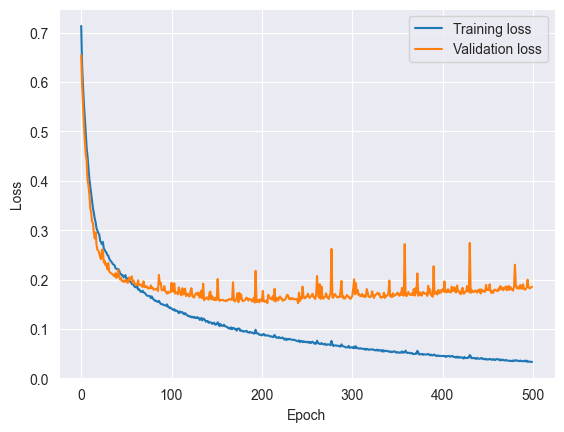

In [9]:
#5.2
#class parameters
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 500
learning_rate = 0.001
###
model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
list_train_loss, list_val_loss = [], []
for epoch in range(num_epochs):
    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_69560\1829612099.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Epoch 0 Training loss 0.6879942945287197 Validation Loss : 0.6289876446127891
Epoch 1 Training loss 0.6066869376580927 Validation Loss : 0.5873724475502968
Epoch 2 Training loss 0.5689149653609795 Validation Loss : 0.5394930928945542
Epoch 3 Training loss 0.5332139326801782 Validation Loss : 0.5066411241889
Epoch 4 Training loss 0.5036666215975073 Validation Loss : 0.49363189488649367
Epoch 5 Training loss 0.4737232474586632 Validation Loss : 0.4484556928277016
Epoch 6 Training loss 0.4478863711598553 Validation Loss : 0.4165217265486717
Epoch 7 Training loss 0.4246418483649628 Validation Loss : 0.3928942039608955
Epoch 8 Training loss 0.40228986098796504 Validation Loss : 0.3687109112739563
Epoch 9 Training loss 0.384011847686164 Validation Loss : 0.3499531000852585
Epoch 10 Training loss 0.36678940472723565 Validation Loss : 0.33915889710187913
Epoch 11 Training loss 0.35029566589790057 Validation Loss : 0.31771479845046996
Epoch 12 Training loss 0.34130543659004986 Validation Loss :

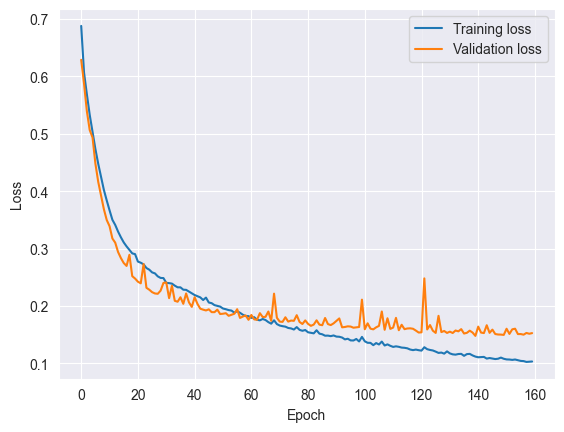

In [8]:
#5.3
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 500
learning_rate = 0.001
patience = 20
patience_counter = 0
###
model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
list_train_loss, list_val_loss = [], []
best_validation_loss = None
for epoch in range(num_epochs):

    train_loss = 0.0
    train_count = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
    
    if best_validation_loss is None:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
    elif best_validation_loss < validation_loss:
        patience_counter += 1
        print(best_validation_loss, " < ",validation_loss)
        print("EARLY STOPPING COUNT : ",patience_counter)
        if(patience_counter == patience):
            break;
    else:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
        patience_counter = 0
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
model = MyMLP(num_input_features, num_hidden_neuron1, num_hidden_neuron2, num_output_neuron)
model.load_state_dict(torch.load('bestval.pt'))
model.eval()
predicts = []
real_labels = []

n_correct = 0
n_samples = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predict = outputs > 0.5
        n_samples += labels.size(0)
        predicts.extend(predict.int().tolist())
        real_labels.extend(labels.int().tolist())

from sklearn.metrics import f1_score, accuracy_score, classification_report

print("Accuracy score of this model: {}".format(accuracy_score(real_labels, predicts)))
print(classification_report(real_labels, predicts))

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_69560\1829612099.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Accuracy score of this model: 0.9404145077720207
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       384
           1       0.96      0.92      0.94       388

    accuracy                           0.94       772
   macro avg       0.94      0.94      0.94       772
weighted avg       0.94      0.94      0.94       772



In [ ]:
#5.4 executed on Colab
#class parameters
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 500
learning_rate = 0.001
###

start_time = time.time()

model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)
model = model.to("cuda") # model works on gpu

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
list_train_loss, list_val_loss = [], []
for epoch in range(num_epochs):
    train_loss = 0.0
    train_count = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to("cuda"), labels.to("cuda")
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to("cuda"), labels.to("cuda")
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
end_time = time.time()
print(f"Time to memorize the dataset: {end_time - start_time}")

# works on GPU execute time : 279.3683476448059
# works on CPU execute time : 282.12509512901306

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_69560\1829612099.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Epoch 0 Training loss 0.6873215187953997 Validation Loss : 0.639795333147049
Epoch 1 Training loss 0.624960937077486 Validation Loss : 0.5911209300160408
Epoch 2 Training loss 0.5864260641834403 Validation Loss : 0.5490307033061981
Epoch 3 Training loss 0.5497697169267679 Validation Loss : 0.5118099614977837
Epoch 4 Training loss 0.5211417659928527 Validation Loss : 0.4748226448893547
Epoch 5 Training loss 0.4896528226665304 Validation Loss : 0.44512270092964173
Epoch 6 Training loss 0.4680762434307533 Validation Loss : 0.441648305952549
Epoch 7 Training loss 0.4469704450685767 Validation Loss : 0.4100093185901642
Epoch 8 Training loss 0.42931266223328024 Validation Loss : 0.37829307168722154
Epoch 9 Training loss 0.4073074252545079 Validation Loss : 0.3629258036613464
Epoch 10 Training loss 0.3963295289232761 Validation Loss : 0.3501537203788757
Epoch 11 Training loss 0.38128246593324444 Validation Loss : 0.32988865226507186
Epoch 12 Training loss 0.36862715022473397 Validation Loss :

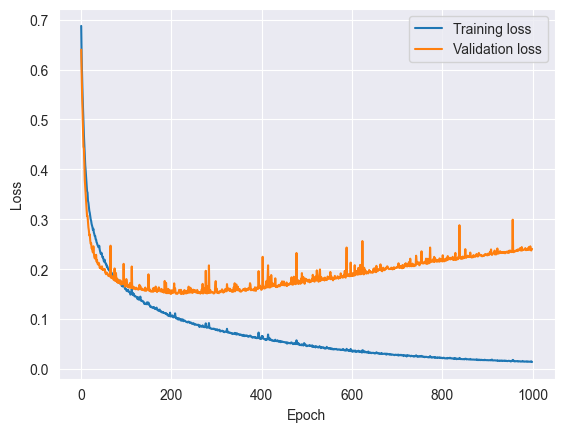

In [10]:
#5.5
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 1000
learning_rate = 7e-4
patience = -1
patience_counter = 0
###
model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
list_train_loss, list_val_loss = [], []
best_validation_loss = None
for epoch in range(num_epochs):

    train_loss = 0.0
    train_count = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
    
    if best_validation_loss is None:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
    elif best_validation_loss < validation_loss:
        patience_counter += 1
        print(best_validation_loss, " < ",validation_loss)
        print("EARLY STOPPING COUNT : ",patience_counter)
        if(patience_counter == patience):
            break;
    else:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
        patience_counter = 0
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
#6 regularization
class MyMLP(nn.Module):
    def __init__(self, num_input_features, num_hidden_neuron1, num_hidden_neuron2, num_output_neurons):
        super(MyMLP, self).__init__()
        self.hidden_layer1 = nn.Linear(num_input_features, num_hidden_neuron1)
        self.hidden_layer2 = nn.Linear(num_hidden_neuron1, num_hidden_neuron2)
        self.output_layer = nn.Linear(num_hidden_neuron2, num_output_neurons)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout1 = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.1)

    def forward(self, X):
        X = torch.tensor(X, dtype=torch.float)
        hidden_res1 = self.dropout1(self.relu(self.hidden_layer1(X)))
        hidden_res2 = self.dropout2(self.relu(self.hidden_layer2(hidden_res1)))
        output = self.sigmoid(self.output_layer(hidden_res2))
        return output

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_79852\2082013677.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Epoch 0 Training loss 0.7415525581263289 Validation Loss : 0.5694891273975372
Epoch 1 Training loss 0.6556840776642666 Validation Loss : 0.5264883443713189
Epoch 2 Training loss 0.6115770241882228 Validation Loss : 0.48389137983322145
Epoch 3 Training loss 0.5788777632803856 Validation Loss : 0.46369148790836334
Epoch 4 Training loss 0.561463579346862 Validation Loss : 0.46579517871141435
0.46369148790836334  <  0.46579517871141435
EARLY STOPPING COUNT :  1
Epoch 5 Training loss 0.5614154965062684 Validation Loss : 0.43016294538974764
Epoch 6 Training loss 0.542963902595677 Validation Loss : 0.4189206168055534
Epoch 7 Training loss 0.5196811651127248 Validation Loss : 0.4055611193180084
Epoch 8 Training loss 0.5178351372103148 Validation Loss : 0.399334254860878
Epoch 9 Training loss 0.49600263147414486 Validation Loss : 0.4029559940099716
0.399334254860878  <  0.4029559940099716
EARLY STOPPING COUNT :  1
Epoch 10 Training loss 0.4955447097367878 Validation Loss : 0.3796456754207611
Ep

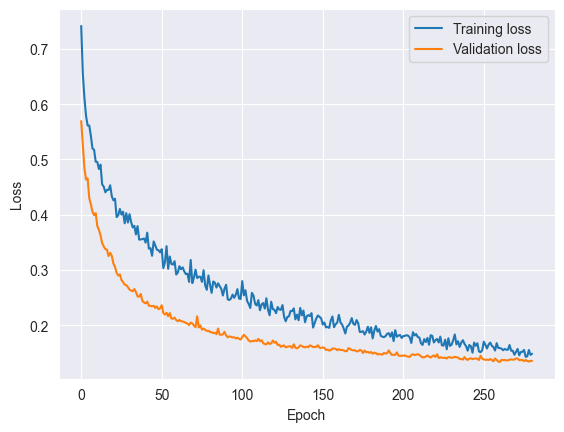

In [11]:
#6 regularization
#5.3
num_input_features = 13
num_hidden_neuron1 = 100
num_hidden_neuron2 = 50
num_output_neuron = 1 #binary classification
####
num_epochs = 500
learning_rate = 0.001
patience = 20
patience_counter = 0
###
model = MyMLP(num_input_features,num_hidden_neuron1, num_hidden_neuron2,num_output_neuron)

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=0.008) #added weight decay
list_train_loss, list_val_loss = [], []
best_validation_loss = None
for epoch in range(num_epochs):

    train_loss = 0.0
    train_count = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_count += 1.0
        train_loss += loss.item()

    validation_loss = 0.0
    with torch.no_grad():
        model.eval()
        for inputs, labels in validation_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            validation_loss += loss.item()

    model.train()

    train_loss /= train_count
    validation_loss /= len(validation_loader)
    print("Epoch", epoch, "Training loss", train_loss,"Validation Loss :",validation_loss)

    list_train_loss.append(train_loss)
    list_val_loss.append(validation_loss)
    
    if best_validation_loss is None:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
    elif best_validation_loss < validation_loss:
        patience_counter += 1
        print(best_validation_loss, " < ",validation_loss)
        print("EARLY STOPPING COUNT : ",patience_counter)
        if(patience_counter == patience):
            break;
    else:
        best_validation_loss = validation_loss
        torch.save(model.state_dict(), "bestval.pt")
        patience_counter = 0
                   

sns.set_style("darkgrid")
plt.plot(list_train_loss, label="Training loss")
plt.plot(list_val_loss, label="Validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
model = MyMLP(num_input_features, num_hidden_neuron1, num_hidden_neuron2, num_output_neuron)
model.load_state_dict(torch.load('bestval.pt'))
model.eval()
predicts = []
real_labels = []

n_correct = 0
n_samples = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predict = outputs > 0.5
        n_samples += labels.size(0)
        predicts.extend(predict.int().tolist())
        real_labels.extend(labels.int().tolist())

from sklearn.metrics import f1_score, accuracy_score, classification_report

print("Accuracy score of this model: {}".format(accuracy_score(real_labels, predicts)))
print(classification_report(real_labels, predicts))

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_79852\2082013677.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)


Accuracy score of this model: 0.9481865284974094
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       384
           1       0.97      0.93      0.95       388

    accuracy                           0.95       772
   macro avg       0.95      0.95      0.95       772
weighted avg       0.95      0.95      0.95       772

